## <font size=5> <strong>Heart Disease Prediction
 

In [576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [577]:
dataset = pd.read_csv("D:\\SEM-6\\heart.csv")

In [578]:
dataset.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [579]:
type(dataset)

pandas.core.frame.DataFrame

In [580]:
dataset.shape

(303, 14)

In [581]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0


In [582]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [583]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [584]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [585]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [586]:
dataset["target"].unique()

array([1, 0], dtype=int64)

1    165
0    138
Name: target, dtype: int64


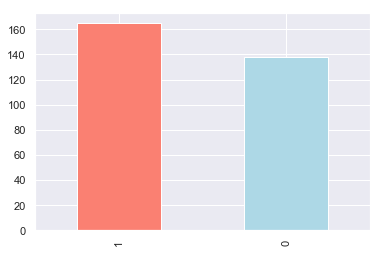

In [587]:
dataset.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
target_temp = dataset.target.value_counts()
print(target_temp)

In [588]:
print("Percentage of patient's without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patient's with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patient's without heart problems: 45.54
Percentage of patient's with heart problems: 54.46


In [589]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

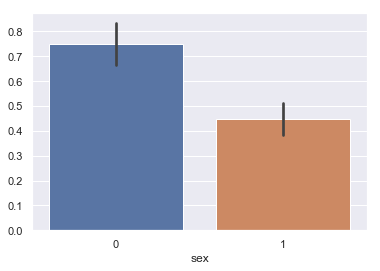

In [590]:
sns.barplot(dataset["sex"],y)

In [591]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

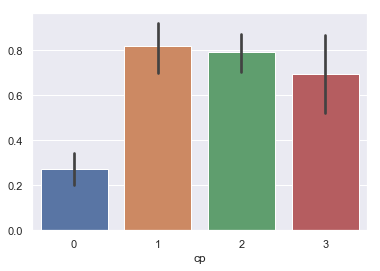

In [592]:
sns.barplot(dataset["cp"],y)

In [593]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

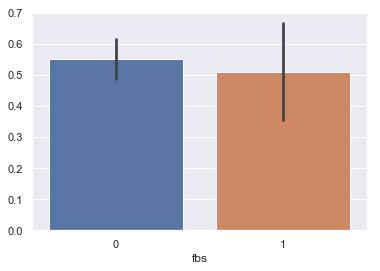

In [594]:
sns.barplot(dataset["fbs"],y)

In [595]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

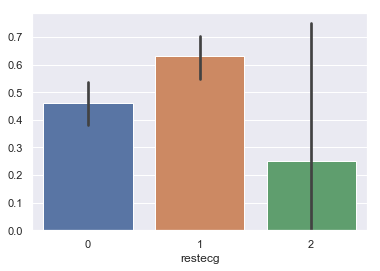

In [596]:
sns.barplot(dataset["restecg"],y)

In [597]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

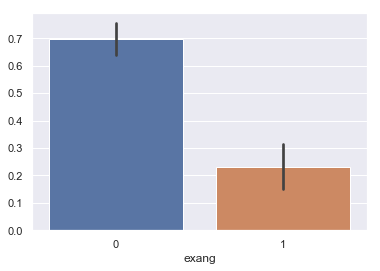

In [598]:
sns.barplot(dataset["exang"],y)

In [599]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

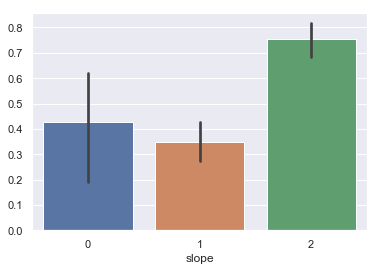

In [600]:
sns.barplot(dataset["slope"],y)

In [601]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

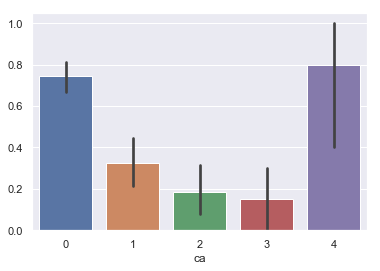

In [602]:
sns.barplot(dataset["ca"],y)

In [603]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

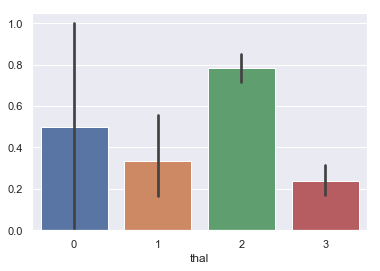

In [604]:
sns.barplot(dataset["thal"],y)

In [605]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.2,random_state=0)

In [606]:
X_train.shape

(242, 13)

In [607]:
X_test.shape

(61, 13)

In [608]:
Y_train.shape

(242,)

In [609]:
Y_test.shape

(61,)

In [610]:
from sklearn.metrics import accuracy_score

### Logistic Regression


In [611]:
from sklearn.linear_model import LogisticRegression
max_accuracy = 0
for x in range(2000):
    lr = LogisticRegression(random_state = x,penalty = 'l1', solver='liblinear')
    lr.fit(X_train,Y_train)
    Y_pred_lr = lr.predict(X_test)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
lr = LogisticRegression(random_state = best_x, penalty = 'l1', solver='liblinear')
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)


In [612]:
Y_pred_lr.shape

(61,)

In [613]:
accuracy_score(Y_test,Y_pred_lr)
score_lr = round(accuracy_score(Y_test,Y_pred_lr)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [614]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(priors=None,var_smoothing=1e-09)

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [615]:
Y_pred_nb.shape

(61,)

In [616]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [617]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [618]:
Y_pred_svm.shape

(61,)

In [619]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### Decision Tree

In [623]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(2000):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
print(max_accuracy)      
print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

81.97
11


In [624]:
print(Y_pred_dt.shape)


(61,)


In [625]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [626]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x,n_estimators=10,n_jobs = 1)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rf = RandomForestClassifier(random_state=best_x,n_estimators=10,n_jobs = 1)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [627]:
print(max_accuracy)
print(best_x)
Y_pred_rf.shape

95.08
1818


(61,)

In [628]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random forest Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest Tree is: 95.08 %


### XGBoost


In [629]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic",eta=0.4,max_depth=1,min_child_weight=3,max_leaves=10,max_delta_step=4)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[10:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [630]:
Y_pred_xgb.shape

(61,)

In [631]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 88.52 %


### Neural Network

In [659]:
from keras.models import Sequential
from keras.layers import Dense

In [660]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=13,kernel_initializer="uniform"))
model.add(Dense(activation = "relu", units = 14,kernel_initializer = "uniform"))
model.add(Dense(1,activation='sigmoid',kernel_initializer = "uniform"))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [661]:
model.fit(X_train,Y_train,batch_size=8,epochs=300)

Epoch 1/300
31/31 [==============================] - 1s 1ms/step - loss: 0.6935 - accuracy: 0.4866
Epoch 2/300
31/31 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5633
Epoch 3/300
31/31 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5288
Epoch 4/300
31/31 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5728
Epoch 5/300
31/31 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5019
Epoch 6/300
31/31 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5227
Epoch 7/300
31/31 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5233
Epoch 8/300
31/31 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.5584
Epoch 9/300
31/31 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.6008
Epoch 10/300
31/31 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.6257
Epoch 11/

31/31 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.7934
Epoch 83/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.7995
Epoch 84/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8214
Epoch 85/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8505
Epoch 86/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8180
Epoch 87/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8460
Epoch 88/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8510
Epoch 89/300
31/31 [==============================] - 0s 999us/step - loss: 0.3852 - accuracy: 0.8480
Epoch 90/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8432
Epoch 91/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8471
Epoch 92/30

31/31 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8209
Epoch 163/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8381
Epoch 164/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8492
Epoch 165/300
31/31 [==============================] - 0s 999us/step - loss: 0.3436 - accuracy: 0.8567
Epoch 166/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8458
Epoch 167/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.7989
Epoch 168/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8078
Epoch 169/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.7793
Epoch 170/300
31/31 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.8439
Epoch 171/300
31/31 [==============================] - 0s 999us/step - loss: 0.4306 - accuracy: 0.7930


31/31 [==============================] - 0s 899us/step - loss: 0.4332 - accuracy: 0.7951
Epoch 243/300
31/31 [==============================] - 0s 966us/step - loss: 0.3721 - accuracy: 0.8406
Epoch 244/300
31/31 [==============================] - 0s 899us/step - loss: 0.3013 - accuracy: 0.8854
Epoch 245/300
31/31 [==============================] - 0s 899us/step - loss: 0.3448 - accuracy: 0.8391
Epoch 246/300
31/31 [==============================] - 0s 899us/step - loss: 0.4574 - accuracy: 0.8098
Epoch 247/300
31/31 [==============================] - 0s 866us/step - loss: 0.3345 - accuracy: 0.8361
Epoch 248/300
31/31 [==============================] - 0s 866us/step - loss: 0.3801 - accuracy: 0.8339
Epoch 249/300
31/31 [==============================] - 0s 932us/step - loss: 0.3988 - accuracy: 0.8161
Epoch 250/300
31/31 [==============================] - 0s 966us/step - loss: 0.3971 - accuracy: 0.8385
Epoch 251/300
31/31 [==============================] - 0s 932us/step - loss: 0.3540 - a

In [662]:
Y_pred_nn = model.predict(X_test)

In [663]:
Y_pred_nn.shape

(61, 1)

In [664]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [665]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


The accuracy score achieved using Neural Network is: 85.25 %


## Output final score

In [684]:
scores = [score_lr,score_nb,score_svm,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 95.08 %
The accuracy score achieved using XGBoost is: 88.52 %
The accuracy score achieved using Neural Network is: 85.25 %


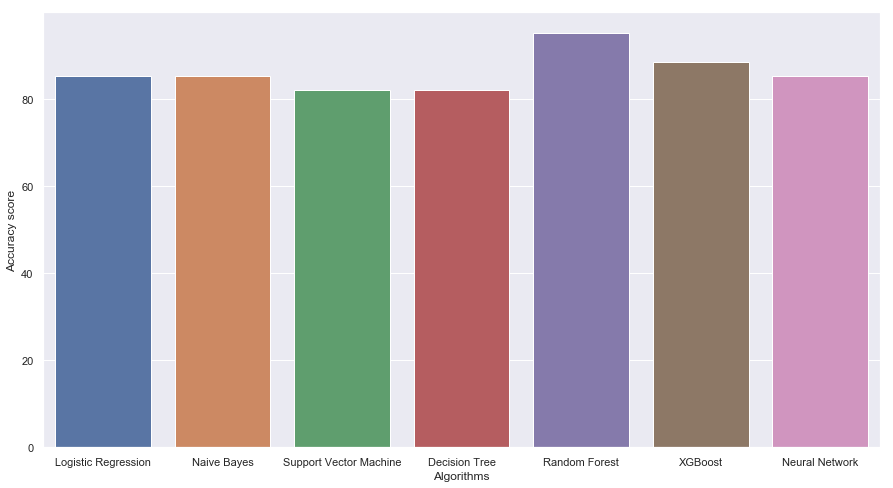

In [685]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Random forest has given highest accuracy of 95.08% <br> <br>

In [682]:
import pickle
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [683]:
from pathlib import Path
my_path = Path("D:\\SEM-6\\Heart\\model.pkl") 
with my_path.open('wb') as fp:
    pickle.dump(rf, fp)